In [17]:
import os
import json
import random
from collections import OrderedDict
import matplotlib.pyplot as plt

In [18]:
# will not work for jupyter notebook
#script_dir = os.path.dirname(__file__) #<-- absolute dir the script is in
#rel_path = "Progress_info.txt"
#abs_file_path = os.path.join(script_dir, rel_path)

abs_file_path = "./Progress_info.txt"
def add_data(num):
    metrics = OrderedDict()
    for x in range(num):
        metrics['epoch'] = x
        metrics['loss'] = random.randint(10000, 100000000000)
        metrics['loc_index'], metrics['error'], metrics['loc_rate'], = return_random(3, 1, 50)
        metrics['val_loc_index'], metrics['val_error'], metrics['val_loc'] = return_random(3, 1, 50)
        with open(abs_file_path , 'a') as file:
            file.write(json.dumps(metrics) + "\n") # use `json.loads` to do the reverse
        print (metrics)

def return_random(num, range1, range2):
    mylist = []
    for x in range(num):
        mylist.append(random.randint(range1, range2))
    mytuple = tuple(mylist)
    return mytuple

add_data(50)


OrderedDict([('epoch', 0), ('loss', 7885911177), ('loc_index', 41), ('error', 17), ('loc_rate', 24), ('val_loc_index', 20), ('val_error', 44), ('val_loc', 21)])
OrderedDict([('epoch', 1), ('loss', 28034786764), ('loc_index', 2), ('error', 38), ('loc_rate', 22), ('val_loc_index', 38), ('val_error', 30), ('val_loc', 30)])
OrderedDict([('epoch', 2), ('loss', 19836128648), ('loc_index', 20), ('error', 31), ('loc_rate', 36), ('val_loc_index', 33), ('val_error', 48), ('val_loc', 7)])
OrderedDict([('epoch', 3), ('loss', 13778265201), ('loc_index', 28), ('error', 18), ('loc_rate', 1), ('val_loc_index', 6), ('val_error', 5), ('val_loc', 23)])
OrderedDict([('epoch', 4), ('loss', 73051175543), ('loc_index', 45), ('error', 3), ('loc_rate', 22), ('val_loc_index', 5), ('val_error', 14), ('val_loc', 33)])
OrderedDict([('epoch', 5), ('loss', 93623018378), ('loc_index', 18), ('error', 23), ('loc_rate', 35), ('val_loc_index', 22), ('val_error', 44), ('val_loc', 1)])
OrderedDict([('epoch', 6), ('loss', 1

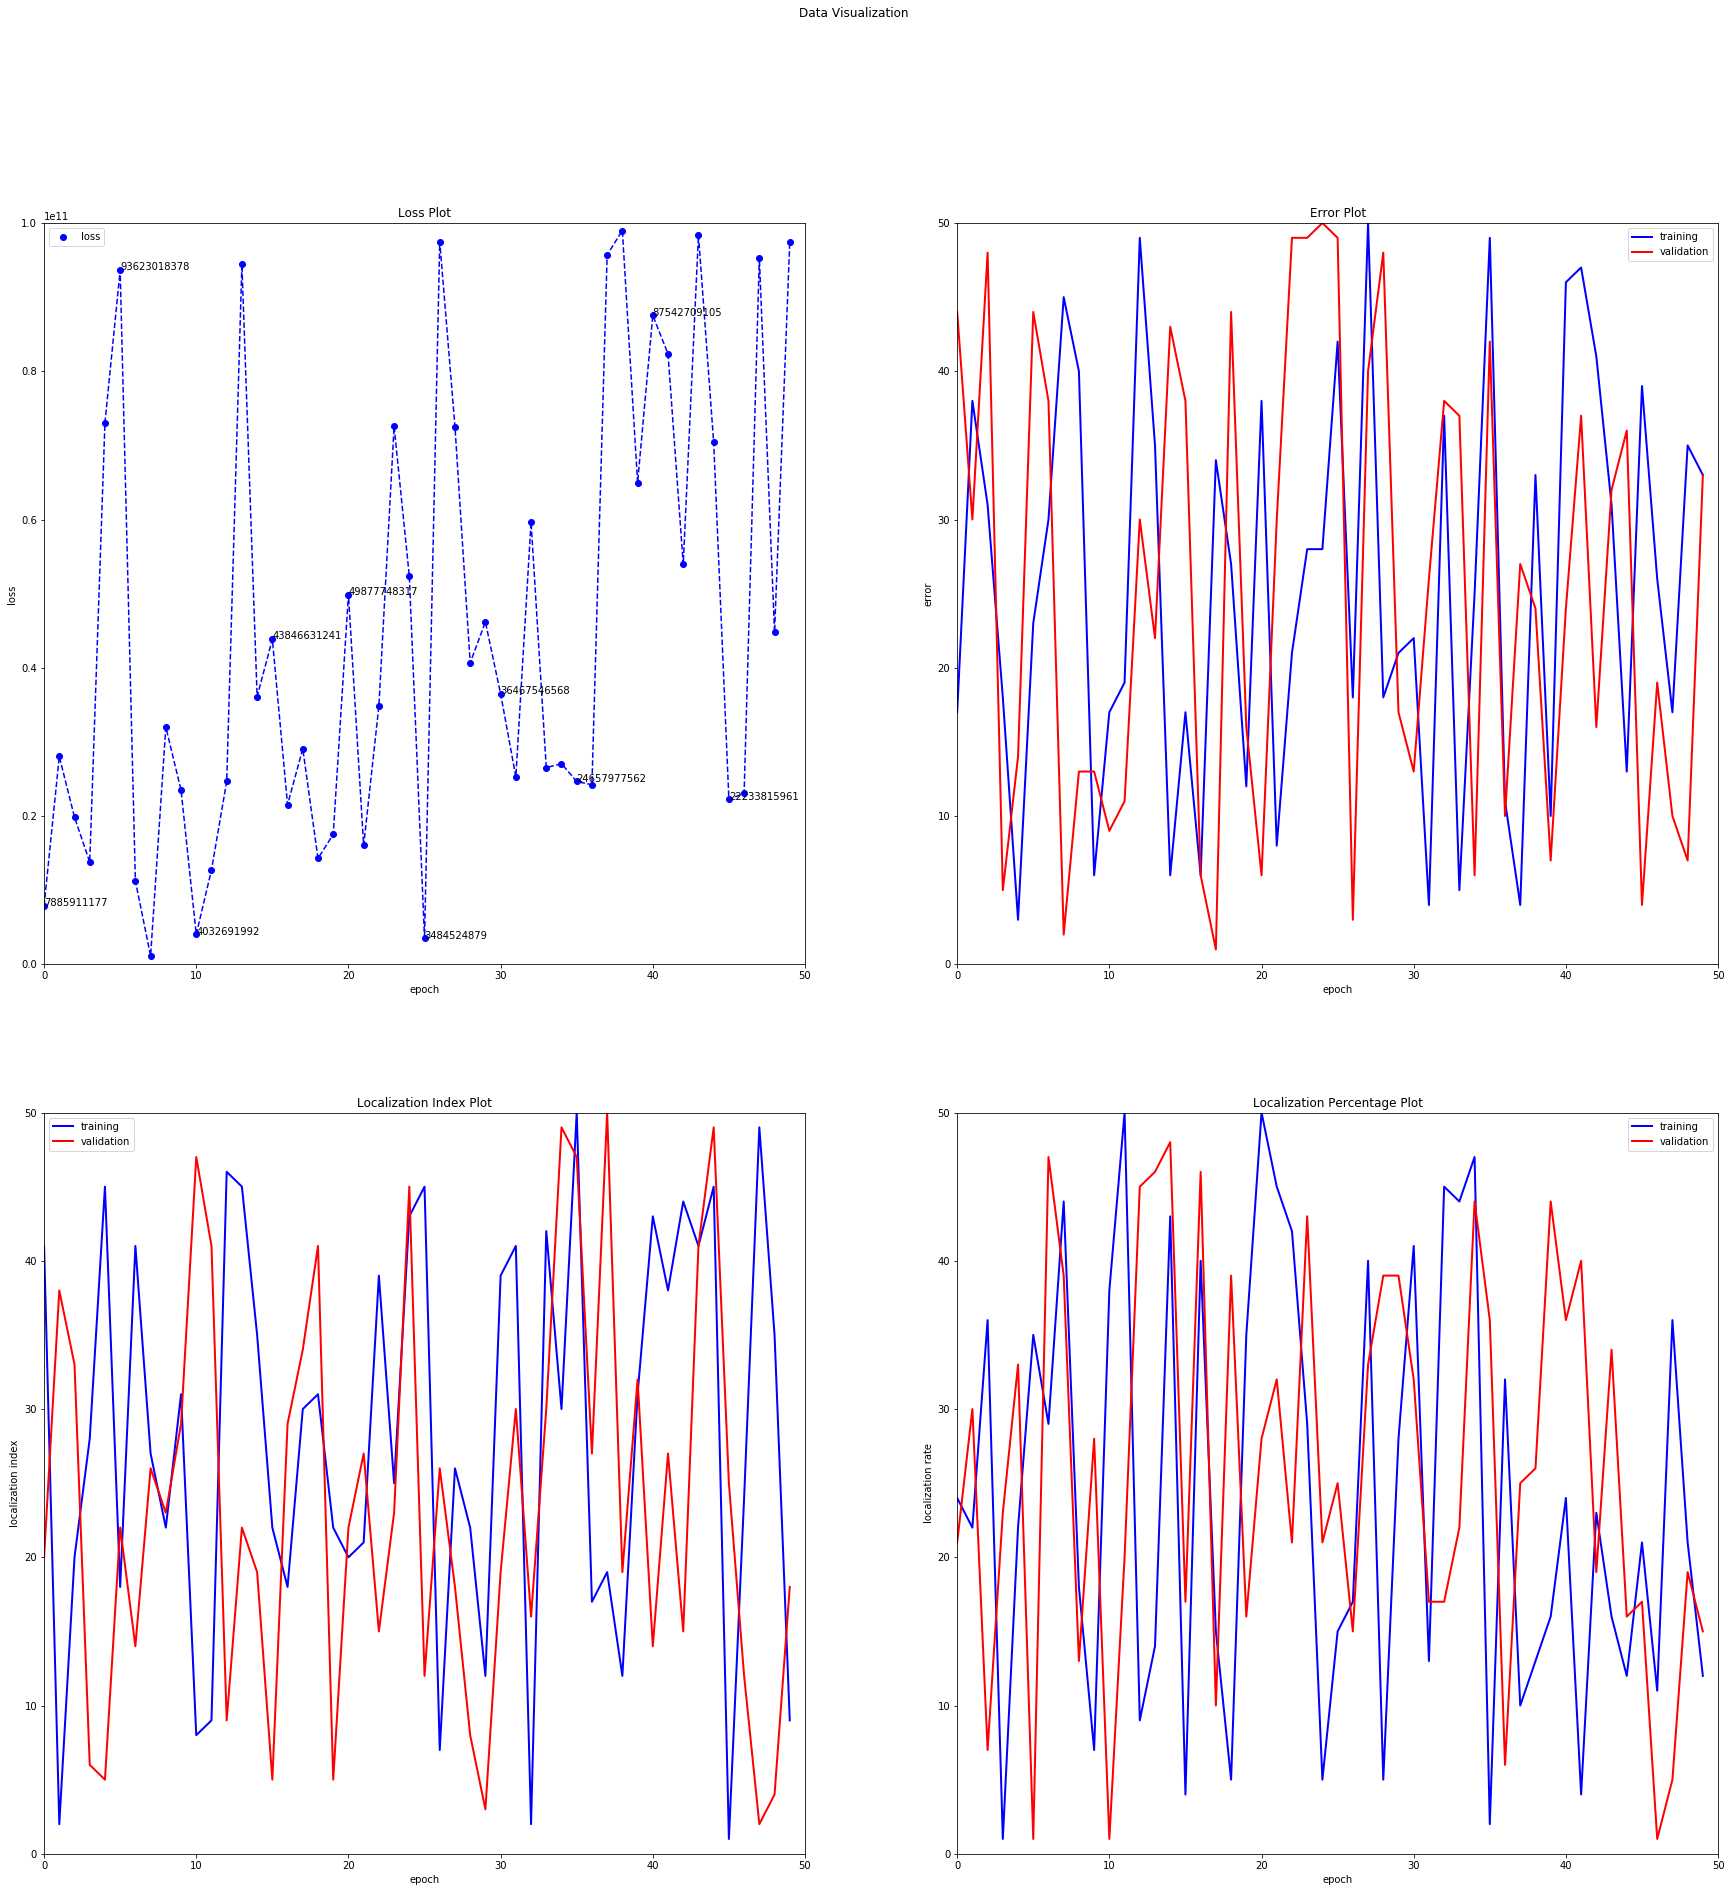

In [19]:
epochs = []; losses = []; localization_indices = []; localization_rates = []
errors = []; val_localization_indices = []; val_errors = []; val_localization_rates = []

with open(abs_file_path ,'r') as file:
    for line in file:
        dict_data  = json.loads(line, object_pairs_hook= OrderedDict)
        #print(isinstance(dict_data , dict))
        #print('%s: %s', ', '.join(f'{k}={v}' for k, v in dict_data.items()))
        if 'epoch' in dict_data:
            epochs.append(dict_data['epoch'])
        if 'loss' in dict_data:
            losses.append(dict_data['loss'])
        if 'loc_index' in dict_data:
            localization_indices.append(dict_data['loc_index'])
        if 'error' in dict_data:
            errors.append(dict_data['error'])
        if 'loc_rate' in dict_data:
            localization_rates.append(dict_data['loc_rate'])
        if 'val_loc_index' in dict_data:
            val_localization_indices.append(dict_data['val_loc_index'])
        if 'val_error' in dict_data:
            val_errors.append(dict_data['val_error'])
        if 'val_loc' in dict_data:
            val_localization_rates.append(dict_data['val_loc'])


fig = plt.figure(figsize=(30,30))
fig.suptitle('Data Visualization')

plt1 = fig.add_subplot(221)
plt1.plot(epochs, losses,  'bo', label='loss')
plt1.plot(epochs, losses,  '--b' )
plt1.set_xlabel('epoch')
plt1.set_ylabel('loss')
plt1.legend()
plt1.set_title("Loss Plot")
for i in range(0, len(losses), 5):
    plt1.text(i, losses[i], losses[i])
plt1.set_xlim(0, 50) # range of epochs
plt1.set_ylim(0, 100000000000) # range of losses

plt2 = fig.add_subplot(222)
plt2.plot(epochs, errors, color='blue', linewidth=2, label='training')
plt2.plot(epochs, val_errors, color='red', linewidth=2, label='validation')
plt2.set_xlabel('epoch')
plt2.set_ylabel('error')
plt2.legend()
plt2.set_title("Error Plot")
plt2.set_xlim(0, 50) # range of epochs
plt2.set_ylim(0, 50) # range of errors

plt3 = fig.add_subplot(223)
plt3.plot(epochs, localization_indices, color='blue', linewidth=2, label='training')
plt3.plot(epochs, val_localization_indices, color='red', linewidth=2, label='validation')
plt3.set_xlabel('epoch')
plt3.set_ylabel('localization index')
plt3.legend()
plt3.set_title("Localization Index Plot")
plt3.set_xlim(0, 50) # range of epochs
plt3.set_ylim(0, 50) # range of localization

plt4 = fig.add_subplot(224)
plt4.plot(epochs, localization_rates, color='blue', linewidth=2, label='training')
plt4.plot(epochs, val_localization_rates, color='red', linewidth=2, label='validation')
plt4.legend()
plt4.set_xlabel('epoch')
plt4.set_ylabel('localization rate')
plt4.set_title("Localization Percentage Plot")
plt4.set_xlim(0, 50) # range of epochs
plt4.set_ylim(0, 50) # range of localization

plt.show()
fig.savefig("data_visualization.pdf")